In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X,y=make_moons(100,noise=0.25,random_state=2)

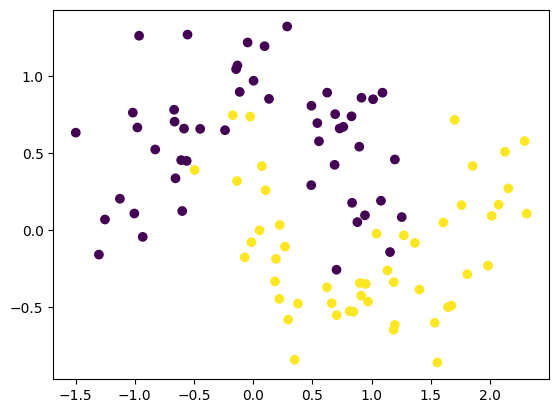

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [5]:
model1=Sequential()

model1.add(Dense(128,input_dim=2,activation="relu"))
model1.add(Dense(128,activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
adam=Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history1=model1.fit(X,y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 [==============================] - 16s 2ms/step


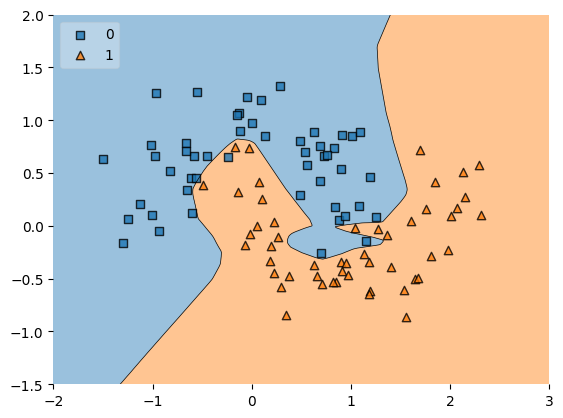

In [7]:
plot_decision_regions(X,y.astype('int'),clf=model1,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()


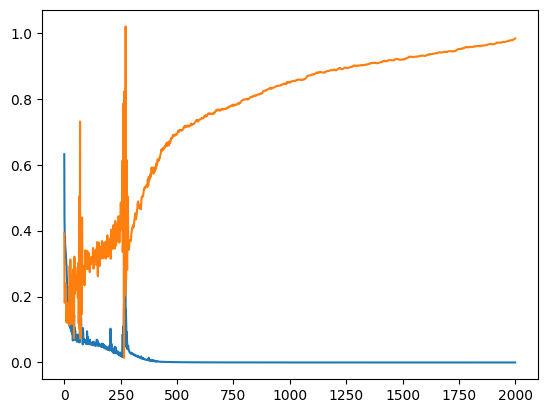

In [8]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [9]:
model2=Sequential()

model2.add(Dense(128,input_dim=2,activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128,activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
adam=Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history2=model2.fit(X,y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 [==============================] - 15s 2ms/step


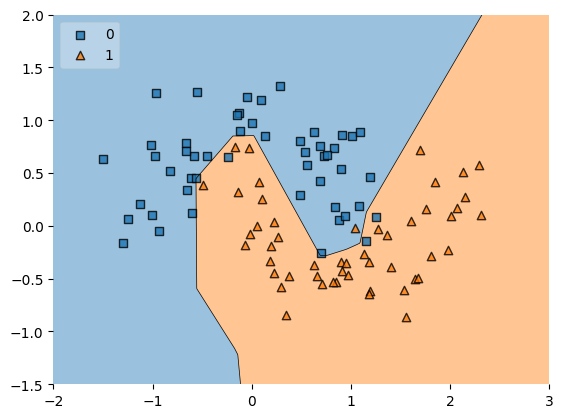

In [11]:
plot_decision_regions(X,y.astype('int'),clf=model2,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

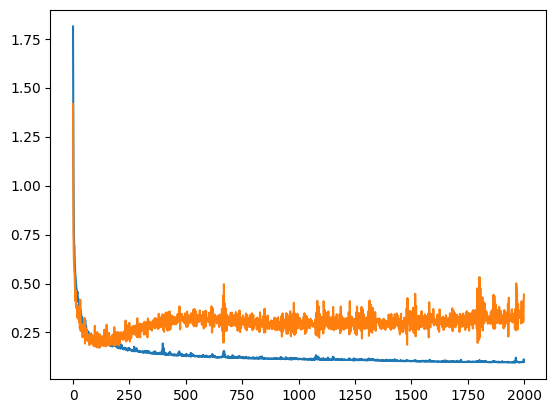

In [12]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [13]:
model1_weight_layer1=model1.get_weights()[0].reshape(256)
model2_weight_layer1=model2.get_weights()[0].reshape(256)

<Axes: >

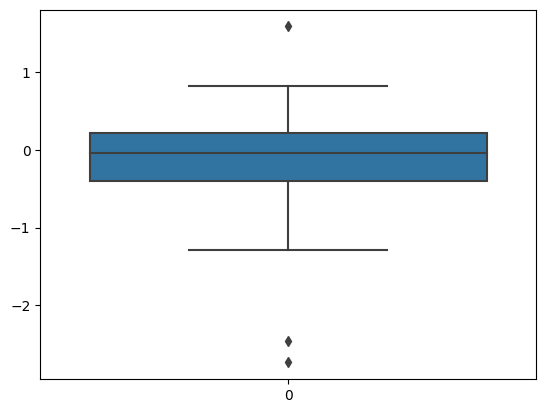

In [14]:
sns.boxplot(model1_weight_layer1)

<Axes: >

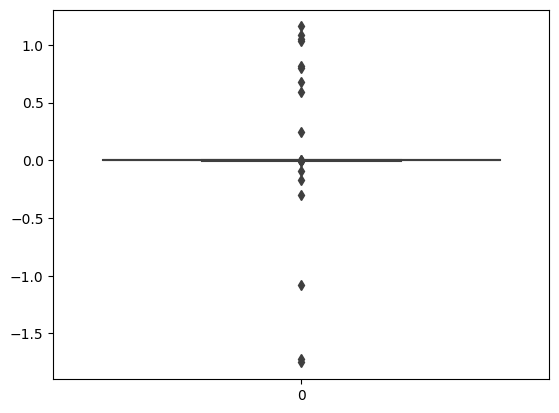

In [15]:
sns.boxplot(model2_weight_layer1)

In [16]:
model1.get_weights()[0].reshape(256)

array([-5.60225546e-01,  2.24682033e-01, -5.52507699e-01,  1.13306686e-01,
        9.76426378e-02, -3.59009415e-01,  3.08265865e-01, -6.19943023e-01,
       -3.95529002e-01,  7.30127618e-02, -3.77981663e-01,  2.87831962e-01,
        2.26483971e-01, -4.97765213e-01,  7.65256584e-02,  2.42578268e-01,
        2.36985937e-01,  2.52843618e-01, -3.10962409e-01, -4.50343996e-01,
       -4.13747787e-01, -3.64357948e-01, -3.82488454e-03, -2.20760852e-02,
        1.96590647e-01, -5.26046336e-01, -3.46673429e-01, -3.73167098e-01,
       -2.56358515e-02,  2.70004153e-01,  2.21559256e-01, -4.77157950e-01,
       -6.35783732e-01, -4.99729246e-01, -4.36520338e-01,  2.96515763e-01,
       -5.41427694e-02,  2.91971743e-01, -7.35628381e-02, -2.05615759e-01,
       -4.83135134e-02, -3.44358236e-02, -5.16824245e-01, -5.57425439e-01,
       -4.71603423e-01,  1.56222133e-03, -2.84661911e-02, -3.09465647e-01,
       -6.60535172e-02, -5.19618928e-01,  3.72528851e-01, -2.60075599e-01,
        2.73891330e-01,  